# TDA  with Python using the Gudhi Library 

# Representing sublevels sets of functions using cubical complexes ([download](https://raw.githubusercontent.com/GUDHI/TDA-tutorial/master/Tuto-GUDHI-cubical-complexes.ipynb))

**Author**  : B. Michel

In [1]:
import numpy as np
import gudhi as gd  
import pickle as pickle
from pylab import *
from sklearn.neighbors.kde import KernelDensity
import seaborn as sns
%matplotlib inline

TDA signatures can be extracted from the upper level or sub level sets of a function  $f :\mathbb R^p \mapsto \mathbb R$. 

One possible approach for studying the topology of the sublevel sets of $f$ is to define a regular grid on $R^d$ and then to define a filtered complex with vertices located on this grid, with $f$ as filtration function. Such a grid based filtered complexes is called a cubical complexes in Gudhi. See the [documentation](http://gudhi.gforge.inria.fr/python/latest/cubical_complex_user.html) on this constrution.

### Crater dataset

We use the crater dataset to illustrate cubical complex filtrations:

In [2]:
f = open("./datasets/crater_tuto","rb")
crater = pickle.load(f)
f.close()

The point cloud is composed of a center annulus and four clusters in $\mathbb R^2$:

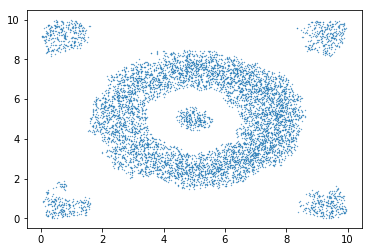

In [3]:
plt.scatter(crater[:,0],crater[:,1],s=0.1);

Instead of directly defining a Vietoris-Rips complex or an alpha complex on the point cloud, we want to study the upper level sets of a density estimator computed on the point cloud. 

We can  visualize the estimated density  with a standard 2d-kernel estimator with the `seaborn` library:

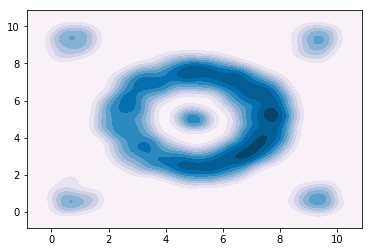

In [4]:
sns.kdeplot(crater[:,0],crater[:,1], shade = True, cmap = "PuBu",bw=.3);

### Cubical complex for the crater dataset

We first define a regular grid on [0,10] x [0,10]

In [5]:
xval = np.arange(0,10,0.05)
yval = np.arange(0,10,0.05)
nx = len(xval)
ny = len(yval)

Next we fit a 2d standard kernel density estimator on the data using scikit-learn:

In [6]:
kde = KernelDensity(kernel='gaussian', bandwidth=0.3).fit(crater)
positions = np.array([[u,v] for u in xval for v in yval ])

The cubical complex filtration considers the sub level sets of the filtration fonction. 
For studying the upper level sets of the density we need to take the opposite of the kde estimator.
We define the filtration value  at each vertex as follows:

In [7]:
filt_values =  - kde.score_samples(X= positions)

The range of filtration values is :

In [8]:
print(max(filt_values))
print(min(filt_values))

26.527204685017267
3.2652121885802146


We are now in position to compute the cubical complex filtration based on the grid [xval, yval] for the filtration fonction `kde`:

In [9]:
cc_density_crater= gd.CubicalComplex(dimensions= [nx ,ny],
                                    top_dimensional_cells =filt_values)

Note that a cubical complex is not simplex tree object:

In [10]:
print(cc_density_crater.__class__)

<class 'gudhi.cubical_complex.CubicalComplex'>


However the class `CubicalComplex` has similar methods:

In [11]:
print(cc_density_crater.dimension())

2


In [12]:
print(cc_density_crater.num_simplices())

160801


In the next notebooks we will compute persistence diagram on cubical complex filtrations.